In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Подготовка данных в единую таблицу для анализа

#### Смотрим листы, которые есть в книге.

In [138]:
sheet_names = pd.ExcelFile('Данные для теста аналитика.xlsx').sheet_names
sheet_names

['г. Надым', 'г. Чебоксары', 'г. Апатиты', 'Лист5']

#### Пишем функцию для обработки каждого листа (представим итоговые данные в удобном для обработке формате - как матрицу "объекты-признаки") и смотрим на размерность данных, представленных в листе.

In [139]:
def prepare_table(sheet):
    '''Подготовка исходных данных в таблицу для анализа'''
    
    df = pd.read_excel('Данные для теста аналитика.xlsx', sheet_name=sheet, header=None)
    # df.iloc[0, :].unique()
    # df.iloc[:, 0].unique()
    df.drop(columns=[0], inplace=True)
    df.drop([0, 1], inplace=True)
    df.reset_index(drop=True, inplace=True)
    # df.tail(12)
    last_row = df[df[1] == 'Что купил КЛИЕНТ по Ассортиментной матрице'].index.values
    df = df.iloc[0:last_row[0] + 1, :]

    df = df.transpose()
    df.reset_index(drop=True, inplace=True)
    df.columns = df.iloc[0, :]
    df.drop([0], inplace=True)
    df.reset_index(drop=True, inplace=True)
    # df['Клиент пришёл'] = pd.to_datetime(df['Клиент пришёл'], format="%H.%M.%S")
    
    return df.shape

for sheet in sheet_names[:-1]:

    print(f'Размерность листа {sheet} = {prepare_table(sheet)}')

Размерность листа г. Надым = (42, 53)
Размерность листа г. Чебоксары = (44, 53)
Размерность листа г. Апатиты = (39, 54)


#### Есть вопросы к данным: в столбцах с временем есть данные, выглядящие некорректно (кол-во секунд более 60), требуется дополнительно выяснять этот вопрос, пока оставим его в стороне.
#### Видим, что в г. Апатиты есть "лишний столбец", посмотрим внимательнее на данные этого города.

In [140]:
def prepare_table(sheet):
    '''Подготовка исходных данных в таблицу для анализа'''
    
    df = pd.read_excel('Данные для теста аналитика.xlsx', sheet_name=sheet, header=None)
    # df.iloc[0, :].unique()
    # df.iloc[:, 0].unique()
    df.drop(columns=[0], inplace=True)
    df.drop([0, 1], inplace=True)
    df.reset_index(drop=True, inplace=True)
    # df.tail(12)
    last_row = df[df[1] == 'Что купил КЛИЕНТ по Ассортиментной матрице'].index.values
    df = df.iloc[0:last_row[0] + 1, :]

    df = df.transpose()
    df.reset_index(drop=True, inplace=True)
    df.columns = df.iloc[0, :]
    df.drop([0], inplace=True)
    df.reset_index(drop=True, inplace=True)
    # df['Клиент пришёл'] = pd.to_datetime(df['Клиент пришёл'], format="%H.%M.%S")
    
    return df.head()

prepare_table('г. Апатиты')

,Клиент пришёл,Клиент ушёл,NaN,Клиент поздоровался первым,Сотрудник поздоровался первым,Ни клиент/ни сотрудник(и) не поздоровались вообще,"Отсутствие сотрудника на рабочем месте в момент, когда покупатель подходит к зоне обслуживания.",Клиент ждёт появления сотрудника в рабочей зоне (зона видимости камеры),Клиент не дождался появления сотрудника и ушёл.,"Клиент зашел, задал уточняющий вопрос (наличие/другое) и сразу вышел",...,"Сотрудник взял любой товар(снэки, вода, разливайка и тп) и начал его употреблять","Сотрудник сразу же после присваивания товара(любого) произвел манипуляции с кассой (положил деньги, приложил карту, приложил телефон к аппарату, пробитие чека) - главное условие - БЕЗ КЛИЕНТА!",Сотрудник взял и потом положил товар обратно на витрину (БЕЗ клиентов),Сотрудник взял товар с витрины/холод-ка и поставил перед клиентом на стол,Сотрудник взял и потом положил товар обратно на витрину (при клиенте),"Сотрудник открыл крышку (бутылки банки и т.п) - касается неразливных товаров, которые обязан открыть после продажи(пиво, алкоголь, напитки)","Посторонние в кассовой зоне (исключение,1-2 сотрудника, на нек-рых точках директор)","Прием пищи (в зоне видимости камеры, при клиентах или без них)",Сотрудник попрощался с клиентом (любая вежливая фраза),Что купил КЛИЕНТ по Ассортиментной матрице
0,00.10.35,00.11.57,NaN,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,1,Н
1,00.52.38,2016-05-01 00:00:00,NaN,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,А
2,01.28.37,01.37.32,NaN,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,А
3,01.28.37,01.37.32,NaN,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"А, З"
4,01.42.09,01.44.51,NaN,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,"А, З"


#### Действительно есть пустой лишний столбец, удалим его и допишем функцию, чтобы в применении к листу она давала готовую таблицу.

In [141]:
def prepare_table(sheet):
    '''Подготовка исходных данных в таблицу для анализа'''
    
    df = pd.read_excel('Данные для теста аналитика.xlsx', sheet_name=sheet, header=None)
    # df.iloc[0, :].unique()
    # df.iloc[:, 0].unique()
    df.drop(columns=[0], inplace=True)
    df.drop([0, 1], inplace=True)
    df.reset_index(drop=True, inplace=True)
    # df.tail(12)
    last_row = df[df[1] == 'Что купил КЛИЕНТ по Ассортиментной матрице'].index.values
    df = df.iloc[0:last_row[0] + 1, :]

    df = df.transpose()
    df.reset_index(drop=True, inplace=True)
    df.columns = df.iloc[0, :]
    df.drop([0], inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    if sheet == 'г. Апатиты':
        df.drop(df.columns[2], axis=1, inplace=True)
    # df['Клиент пришёл'] = pd.to_datetime(df['Клиент пришёл'], format="%H.%M.%S")
    
    return df

#### Пора соединить данные, находящиеся в разных листах в одну таблицу. Посмотрим как она выглядит.

In [142]:
df = pd.concat([prepare_table(sheet) for sheet in sheet_names[:-1]],
          ignore_index=True)
df

,Клиент пришёл,Клиент ушёл,Клиент поздоровался первым,Сотрудник поздоровался первым,Ни клиент/ни сотрудник(и) не поздоровались вообще,"Отсутствие сотрудника на рабочем месте в момент, когда покупатель подходит к зоне обслуживания.",Клиент ждёт появления сотрудника в рабочей зоне (зона видимости камеры),Клиент не дождался появления сотрудника и ушёл.,"Клиент зашел, задал уточняющий вопрос (наличие/другое) и сразу вышел","Сотрудник выявляет потребности (любой фразой)/начинает диалог, не учитывая прив-е",...,"Сотрудник взял любой товар(снэки, вода, разливайка и тп) и начал его употреблять","Сотрудник сразу же после присваивания товара(любого) произвел манипуляции с кассой (положил деньги, приложил карту, приложил телефон к аппарату, пробитие чека) - главное условие - БЕЗ КЛИЕНТА!",Сотрудник взял и потом положил товар обратно на витрину (БЕЗ клиентов),Сотрудник взял товар с витрины/холод-ка и поставил перед клиентом на стол,Сотрудник взял и потом положил товар обратно на витрину (при клиенте),"Сотрудник открыл крышку (бутылки банки и т.п) - касается неразливных товаров, которые обязан открыть после продажи(пиво, алкоголь, напитки)","Посторонние в кассовой зоне (исключение,1-2 сотрудника, на нек-рых точках директор)","Прием пищи (в зоне видимости камеры, при клиентах или без них)",Сотрудник попрощался с клиентом (любая вежливая фраза),Что купил КЛИЕНТ по Ассортиментной матрице
0,01.37.23,01.40.08,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,РП
1,01.43.58,01.44.48,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,01.47.25,01.56.00,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,РП
3,2015-04-02 00:00:00,1951-05-02 00:00:00,0,1,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,1,А
4,07.48.08,07.48.55,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,22.24.28,22.24.39,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
121,22.43.43,22.46.11,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,А
122,2013-08-23 00:00:00,1956-08-23 00:00:00,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
123,23.13.43,23.16.51,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,"РП, П"


### 2. Подготовка данных для анализа

#### Теперь можно заняться подготовкой данных для анализа. Смотрим есть ли в данных пропущенные значения.

In [143]:
df.isnull().sum().sum()

4

#### Есть 4 пропущенных значения, посмотрим в каких фичах они находятся.

In [144]:
df.isnull().sum()[df.isnull().sum() == 1]

0
Клиент ждёт появления сотрудника в рабочей зоне (зона видимости камеры)    1
Сотрудник предложил вариант вместо отсутствующего товара/услуги            1
Сотрудник взял и потом положил товар обратно на витрину (при клиенте)      1
Сотрудник попрощался с клиентом (любая вежливая фраза)                     1
dtype: int64

#### Думаю, что в данном случае пропущенные значения можно заменить нулем. Сделаем это.

In [145]:
df.fillna(0, inplace=True)

#### Посмотрим, нет ли "сюрпризов" в данных - выведем для каждого столбца его уникальные данные.

In [146]:
for ind, i in enumerate(df.columns):
    if ind > 1:
        print(i)
        print(df[i].unique())
        print('=======')

Клиент поздоровался первым
[0 1 '-']
Сотрудник поздоровался первым
[0 1 '-']
Ни клиент/ни сотрудник(и) не поздоровались вообще
[1 0 '-']
Отсутствие сотрудника на рабочем месте  в момент, когда покупатель  подходит к зоне обслуживания.
[1 0]
Клиент ждёт появления сотрудника в рабочей зоне (зона видимости камеры)
[0 1]
Клиент не дождался появления сотрудника и ушёл.
[0 1]
Клиент зашел, задал уточняющий вопрос (наличие/другое) и сразу вышел
[0 1]
Сотрудник выявляет потребности (любой фразой)/начинает диалог, не учитывая прив-е
[0 1 '-']
Клиент сам озвучил свою потребность/начал диалог, не учитывая прив-е
[1 0 '-']
Сотрудник озвучил акции
[0 1]
Сотрудник предложил товар по кросс-продаже (к пиву чипсы, пакет и т.д)
[0 1]
Клиент согласился, на предложение сотрудника приобрести доп.товар (по акции/кр-пр)
[0 1]
Клиент сам попросил доп.товар или акционный товар (например, увидел желтый ценник)
[0 1]
Сотрудник отработал возражение клиента (у вас дорого и т. д.) (дал "+" агрумент)
[0 1]
Клиент не

#### Как видим, помимо нулей и единиц в данных присутствуют дефисы и знаки вопроса, вероятно их можно интерпретировать как пропущенные значения. Так и поступим. Как видно ниже в таком случае кол-во пропущенных значений возрастает до 36.

In [147]:
df.replace(['-', '?', '1?'], np.nan, inplace=True)

In [148]:
df.isnull().sum().sum()

36

#### В данной ситуации неясно можно ли заменить пропущенные значения на что-либо, поэтому попробуем выкинуть данные с такими строками из дальнейшего анализа.

In [149]:
df.dropna(inplace=True)

Размерность итоговой таблицы теперь такова:

In [150]:
df.shape

(114, 53)

#### У нас имеется последний столбец, выбивающийся по своей структуре от остальных, его нужно приводить к удобному для анализа виду, например, через one-hot кодировку, но пока, т.к. фичей в отношении к кол-ву данных и так очень много, оставим его для дальнейшего анализа. Также избавимся от неинформативных столбцов - тех, в которых лишь одно уникальное значение, т.к. этот столбец ведет себя как константа и не представляет для нас интереса в целях объяснения целевой переменной.

In [151]:
df.drop(columns=['Что купил КЛИЕНТ по Ассортиментной матрице', 
                'Клиент не согласился с доводами сотрудника на его возражение (значит, не совершил покупку)',
                'Сотрудник попросил перевести на личную карту',
                'Сотрудник попросил перевести на личную карту - при клиенте или сразу после его ухода (1-2мин) произвел манипуляции, которые могут значить, что оплатил сам (приложил телефон к терминалу, внес деньги в кассу, записал в тетрадь)',
                'Сотрудник попросил перевести на личную карту - после ухода клиента (2 мин) сотрудник никаких манипуляций не производил  (приложил телефон к терминалу, внес деньги в кассу, записал в тетрадь)',
                'Клиент пришёл',
                'Клиент ушёл'], 
        inplace=True)

#### Посмотрим является ли наша выборка сбалансированной. Как видно ниже, соотношение не так далеко от 50 %.

In [152]:
df['КУПИЛ'].sum() / df.shape[0]

0.6491228070175439

### 3. Отбор значимых переменных

#### В этом разделе постараемся отобрать значимые переменные - которые действительно оказывают влияние на целевую переменную. Поскольку далее я хочу построить модель логист. регрессии, нам понадобится разбить данные на тренировочную и тестовую выборки, сделаем это.

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

Y = df['КУПИЛ']
X = df
X = X.drop(['КУПИЛ'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, stratify=Y, test_size=0.2)

#### Поскольку мы имеем категоризированные данные для отбора на значимость мы можем воспользоваться Хи-2 критерием. Выведем ниже значения Хи-2 статистики для каждого столбца данных (чем выше значение данной статистики - тем с большей вероятностью имеется связь между целевой переменной и фичей).

In [154]:
fs = SelectKBest(chi2, k='all')
fs.fit(x_train, y_train)
fs.scores_

array([3.08968927e-02, 7.06214689e-02, 3.18398498e-01, 1.35143008e+00,
       1.30579096e+00, 1.84375000e+00, 2.58125000e+01, 2.20338983e-01,
       2.26955257e-01, 7.25105932e-01, 1.08474576e+01, 7.05084746e+00,
       4.08287637e+00, 5.42372881e-01, 5.42372881e-01, 1.48305085e+00,
       1.30579096e+00, 1.93061441e-01, 2.00677966e+01, 7.05084746e+00,
       2.44067797e+01, 2.98305085e+01, 1.93061441e-01, 1.62711864e+00,
       1.51864407e+01, 1.30169492e+01, 1.41016949e+01, 1.62711864e+00,
       4.41384181e-03, 1.62711864e+01, 1.62711864e+01, 5.42372881e-01,
       1.08474576e+00, 5.42372881e-01, 5.42372881e-01, 1.48305085e+00,
       5.42372881e-01, 1.93061441e-01, 5.12711864e-02, 2.03392910e+01,
       5.04343220e-01, 9.76271186e+00, 1.53813559e-01, 7.72245763e-01,
       2.35659428e+00])

#### Посчитаем критическое значение Хи-2 статистики. Оно нам нужно чтобы выбирая уровень значимости (вероятность ошибки 1 рода) мы могли бы либо отклонить гипотезу о том, что целевая переменная не зависит от фичи, либо не отклонять ее.

In [155]:
from scipy.stats import chi2

alpha = 0.01
d_of_f = (2 - 1) * (2 - 1)
critical = chi2.ppf(1 - alpha, d_of_f)
critical

6.6348966010212145

#### Крит. значение равно 6.63, поэтому если статистика Хи-2 для данного столбца больше 6.63, можно отклонить гипотезу о том, что целевая переменная не зависит от данной фичи на выбранном нами уровне значимости. Я выбрал уровень 1%, - т.е. лишь в 1% случаев мы ошибемся. Построим графики для значений Хи-2 статистики и p-значений столбцов. 

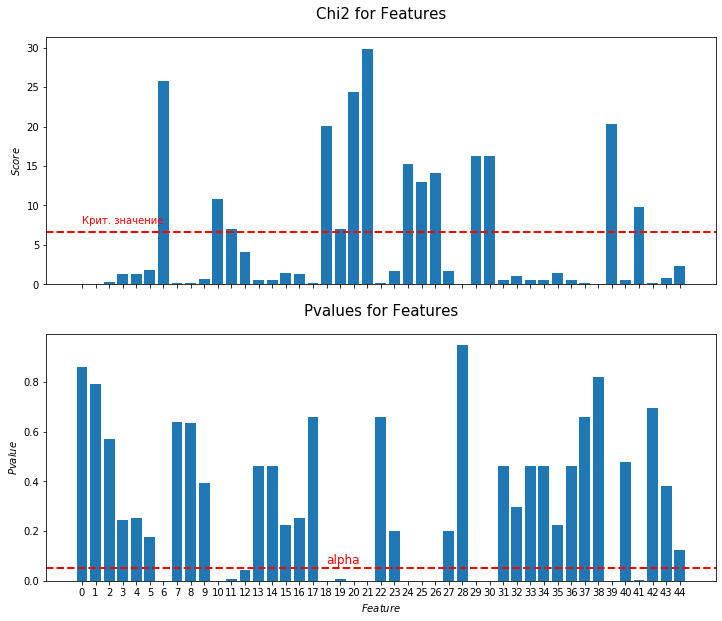

In [156]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,10))


axs[0].set_title('Chi2 for Features', y=1.05, size=15)
axs[0].bar([i for i in range(len(fs.scores_))], fs.scores_)
axs[0].axhline(critical, color="red", linestyle='dashed', lw=2)
axs[0].text(0, critical + 1, 'Крит. значение', color="red", fontsize=10)
axs[0].set_ylabel('$Score$', fontsize=10)
axs[0].set_xticks(np.arange(0, len(fs.scores_), 1))

axs[1].set_title('Pvalues for Features', y=1.05, size=15)
axs[1].bar([i for i in range(len(fs.pvalues_))], fs.pvalues_)
axs[1].axhline(0.05, color="red", linestyle='dashed', lw=2)
axs[1].text(18, 0.05 + 0.02, 'alpha', color="red", fontsize=12)
axs[1].set_ylabel('$Pvalue$', fontsize=10)
axs[1].set_xlabel('$Feature$', fontsize=10)
                        
plt.show()

#### На верхнем графике мы можем видеть значимые переменные - те, значения которых превосходят критическое значение (выше красной линии), на нижнем картинка дающая ту же информацию, но через p-значения, в данном случае если p-значение для конкретной фичи менее выбранного нами уровня значимости (1 %), то фича действительно оказывает влияние на целевую переменную. Посмотрим ниже на значимые переменные, также напишем их значение Хи-2 и номер колонки.

In [157]:
f_significant = []

for index, score in enumerate(fs.scores_):
    if score > critical:
        f_significant.append(index)
        print(x_train.columns[index])
        print(f'index = {index}')
        print(round(score, 1))
        print('=================')

Клиент зашел, задал уточняющий вопрос (наличие/другое) и сразу вышел
index = 6
25.8
Сотрудник предложил товар по кросс-продаже (к пиву чипсы, пакет и т.д)
index = 10
10.8
Клиент согласился, на предложение сотрудника приобрести доп.товар (по акции/кр-пр)
index = 11
7.1
Сотрудник озвучил стоимость покупки клиенту
index = 18
20.1
Клиент оплачивает наличкой
index = 19
7.1
Клиент оплачивает картой
index = 20
24.4
Сотрудник пробил фискальный чек (не терминальный чек, а кассовый) при клиенте
index = 21
29.8
Сотрудник выдал клиенту фиск.чек (при наличке, при карте, при переводе на карту сотрудника)
index = 24
15.2
Сотрудник выдал клиенту, оплатившему картой,  терминальный чек
index = 25
13.0
Сотрудник не выдал ни одного чека клиенту (не имеет значения по какой причине)
index = 26
14.1
Сотрудник наливает разливное пиво в бутыль при клиенте
index = 29
16.3
Сотрудник поставил перед клиентом разливное пиво в бутыле и положил крышку рядом.
index = 30
16.3
Сотрудник  взял товар с витрины/холод-ка и 

#### В данном случае первую фичу можно удалить, т.к. если клиент сразу вышел - он точно не купит товар. Также переменные с индексами 29 и 30 являются совершенно коррелированными, нужно избавиться от одной из них, т.к. для модели такая ситуация будет ухудшать оценки, да и информации вторая переменная для нас не несет.

In [158]:
f_significant.remove(6)
f_significant.remove(30)
f_significant

[10, 11, 18, 19, 20, 21, 24, 25, 26, 29, 39, 41]

#### Построим модель лог. регрессии для прогноза целевой переменной. Поскольку наши признаки находятся в одинаковом масштабе, по коэффициентам регрессии можно также судить о значимости переменных. Также модель может дать интерпретацию для коэффициентов при переменных. Ниже я подбираю параметр модели (параметр регуляризации) осуществляя так называемый "поиск по сетке". 

In [159]:
from sklearn.model_selection import (GridSearchCV, StratifiedKFold)
from sklearn.linear_model import LogisticRegression


lr_params = {'C': np.arange(0.5, 1, 0.1)}

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

lr = GridSearchCV(LogisticRegression(random_state=17, max_iter=1000), param_grid=lr_params, cv=skf)
lr.fit(x_train.loc[:, x_train.columns[f_significant]], y_train)
print(f'Лучшее сочетание параметров для LogisticRegression: {lr.best_params_}')

Лучшее сочетание параметров для LogisticRegression: {'C': 0.5}


#### Мы можем посмотреть на "точность" предсказывания модели на тестовых данных (которых модель "не видела"). Как видим ниже порядка 96 % тестовых данных модель предсказывает верно.

In [160]:
from sklearn.metrics import accuracy_score


print(f'''Accuracy for LogisticRegression: {round(accuracy_score(y_test, 
lr.predict(x_test.loc[:, x_test.columns[f_significant]])), 2)}''')

Accuracy for LogisticRegression: 0.96


#### Можем взглянуть на коэффициенты при переменных, чем выше значение коэффициента тем более значима переменная. Но на данном этапе как мы видим, к сожалению, многие фичи оказываются не совсем релевантными - какая разница каким образом расплачивается клиент, если он уже осуществляет покупку, наверное то же относится и к чеку, как и поставленный перед клиентом на стол товар.

In [161]:
for index, coef in enumerate(lr.best_estimator_.coef_[0]):
    print(x_test.loc[:, x_test.columns[f_significant]].columns[index])
    print(round(coef,2))
    print('=============================')

Сотрудник предложил товар по кросс-продаже (к пиву чипсы, пакет и т.д)
0.35
Клиент согласился, на предложение сотрудника приобрести доп.товар (по акции/кр-пр)
0.19
Сотрудник озвучил стоимость покупки клиенту
0.82
Клиент оплачивает наличкой
0.53
Клиент оплачивает картой
1.03
Сотрудник пробил фискальный чек (не терминальный чек, а кассовый) при клиенте
1.42
Сотрудник выдал клиенту фиск.чек (при наличке, при карте, при переводе на карту сотрудника)
0.62
Сотрудник выдал клиенту, оплатившему картой,  терминальный чек
0.42
Сотрудник не выдал ни одного чека клиенту (не имеет значения по какой причине)
1.09
Сотрудник наливает разливное пиво в бутыль при клиенте
0.78
Сотрудник  взял товар с витрины/холод-ка и поставил перед клиентом на стол
0.9
Сотрудник открыл крышку (бутылки банки и т.п) - касается неразливных товаров, которые обязан открыть после продажи(пиво, алкоголь, напитки)
0.51


#### Попробуем сделать некоторые выводы из попытки анализа данных.
Как видно, такие переменные, как приветствия клиента, отсутствие сотрудника на месте, когда покупатель подошел к зоне обслуживания, посторонние в зоне, прощание с клиентом и т.д. оказались не влияющими на решение клиента о покупке. 
Также интересно отметить, что по данным получается, что фактор оплаты картой значительно более значим, чем оплата наличными, но это можно попробовать объяснить тем, что клиенты просто чаще расплачиваются картами)

### 4. Воронка

#### Построим воронку этапов покупки для клиента.

In [162]:
f'Всего мы наблюдаем {df.shape[0]} клиентов'

'Всего мы наблюдаем 114 клиентов'

#### В наших данных нет фичи, свидетельствующей о контакте с клиентом, построим ее взяв за основу нижеуказанные переменные (если хоть одна из них приняла значение "1", контакт состоялся).

In [163]:
df['Контакт с клиентом'] = df['Сотрудник выявляет потребности (любой фразой)/начинает диалог, не учитывая прив-е'] + \
df['Клиент сам озвучил свою потребность/начал диалог, не учитывая прив-е'] + \
df['Сотрудник озвучил стоимость покупки клиенту']

df['Контакт с клиентом'] = df['Контакт с клиентом'].apply(lambda x: 1 if x > 0 else 0)

In [164]:
f'С данными клиентами у сотрудника был контакт - {df["Контакт с клиентом"].sum()} чел.'

'С данными клиентами у сотрудника был контакт - 108 чел.'

In [165]:
f'{df["КУПИЛ"].sum()} чел. осуществили покупку'

'74 чел. осуществили покупку'

In [166]:
f'''Таким образом можно наблюдать следующее соотношение от вошедших клиентов к кол-ву клиентов, которые приобрели товар 
              1 : {round(df["Контакт с клиентом"].sum() / df.shape[0], 2)} : {round(df["КУПИЛ"].sum() / df.shape[0],2)}'''

'Таким образом можно наблюдать следующее соотношение от вошедших клиентов к кол-ву клиентов, которые приобрели товар \n              1 : 0.95 : 0.65'

Т.е. лишь 5 % посетителей ушли из торговой точки не контактировав с сотрудником - вероятно это те клиенты, которые либо не нашли нужный товар, либо их не устроила его цена. После же контакта с сотрудником идет существенный "отсев" - ок. 30% посетителей.
Далее можно было бы попробовать посмотреть какое будет соотношение после убеждения сотрудником клиента в доводах, что, товар не дорогой к тем, кто после этих доводов его приобретет, и посмотреть отношения по разным точкам (возможно где-то работают более убеждающие продавцы), но настоящие данные по этим переменным представлены лишь одним покупателем.

Таким образом, в ходе анализа на очень ограниченной выборке нам удалось выявить незначимые факторы, мы построили модель лог. регрессии, в случае более полных данных можно было бы интерпретировать коэффициенты при ее переменных. Построили вариант воронки, который дает понять, что большая часть клиентов отсеивается лишь после контакта с покупателем. Далее нужно понимать как устроены магазины, если в них уже есть информация о ценах и проще это выяснить самому чем спросить продавца, то возможно на этапе продаже могли бы быть "узкие места", над которыми можно было бы поработать.